In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ape import accounts, chain, Contract, networks, project

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# USDC/WETH 5bps pool, 8h candles over Dec 2022 to May 2023
# @dev {tick_width: fp}
FILEPATHS = {
   0: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_0_7200_16219692_17267692_2400.csv",  # full range LP
   2800: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_2800_7200_16219692_17267692_2400.csv",
   5600: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_5600_7200_16219692_17267692_2400.csv",
   8400: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_8400_7200_16219692_17267692_2400.csv",
   11200: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_11200_7200_16219692_17267692_2400.csv",
   14000: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_14000_7200_16219692_17267692_2400.csv",
   16800: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_16800_7200_16219692_17267692_2400.csv",
   22400: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_22400_7200_16219692_17267692_2400.csv",
   33600: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_33600_7200_16219692_17267692_2400.csv",
   44800: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_44800_7200_16219692_17267692_2400.csv",
}

In [5]:
df = pd.read_csv(FILEPATHS[0])
df

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,position_token_id,position_liquidity,position_tick_lower,position_tick_upper,position_amount0,position_amount1,position_fees0_cumulative,position_fees1_cumulative
0,16219693,1184180473737,1000096373981086032955,0,48211096091070,2302457180693885351454651093163492,205553,31203981017892687890,2181620581902003936411883992456929,1026699780925062056301321001565722942741084,-1,34413581591046522,-887270,887270,1184294597923,1000000000000000000000,0,0
1,16222093,1175860832468,1007172418046749714633,36870369,35121222243234717,2318747899162385489001287554456344,205694,17540821031132433136,2181985157052788187585985499073660,1027046583748145707407639599439896464086763,-1,34413581591046522,-887270,887270,1184294597923,1000000000000000000000,0,0
2,16224493,1195620849490,990526886870751338638,79507064,62541008198979213,2280425969616657314568929983238151,205361,30523448134936311091,2182406749771601875934982373447527,1027317711286579945199071017760952647928490,-1,34413581591046522,-887270,887270,1184294597923,1000000000000000000000,0,0
3,16226893,1203225714564,984266362984504881565,110750550,85149890953964578,2266012770497242894086255374140612,205234,20905059435363221456,2182715686150892854181613442855243,1027541268492241619844457934521929909830784,-1,34413581591046522,-887270,887270,1184294597923,1000000000000000000000,0,0
4,16229293,1200989209550,986275362611888780077,23041406,19906669647239693,2270435262486917424056195007509857,205273,22227312718227892744,2182943499819872818882169549269372,1027738088574684734465475778290005927962009,-1,34416653935879386,-887270,887270,1203333135233,984354235432958918525,110750550,85149890953964578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,17256493,1483531666195,820791900865718094151,49305725,26475793703772034,1863578556449392031538434625661268,201323,27420357340978417904,2374915665675843076475381608708728,1143303341153993455122962271726629264301423,-1,34895139723049839,-887270,887270,1480234759987,822620040623526736953,19637031525,11845236998428987242
433,17258893,1488138579228,818304518861634471574,14056381,6520485285497433,1857870207979672951132848076883101,201262,28684533318695592725,2375052732962575387887576720301920,1143366924034890098429964558540172533901472,-1,34896282381872287,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276
434,17261293,1479470248169,823099028576077162663,27350472,16283872429414352,1868755613785232690185652557661677,201379,20097267437575475732,2375182366967365283755698550567022,1143462129261915180149816108783753626834180,-1,34896282381872287,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276
435,17263693,1493455353249,815391314796296811690,56383853,28434060989323540,1851256099273191187753267917130117,201190,29915981331513473191,2375465478720511304356360392619927,1143580608785792754282024902648959495253213,-1,34896282381872287,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276


In [6]:
def price(sqrt_price_x96: int) -> int:
    return (int(sqrt_price_x96) ** 2) // (1 << 192)

In [7]:
df['price'] = df['sqrtPriceX96'].apply(price)
df['price']

0      844547259
1      856540493
2      828462373
3      818023045
4      821219170
         ...    
432    553268878
433    549884621
434    556347131
435    545976358
436    547272835
Name: price, Length: 437, dtype: int64

<Axes: xlabel='number'>

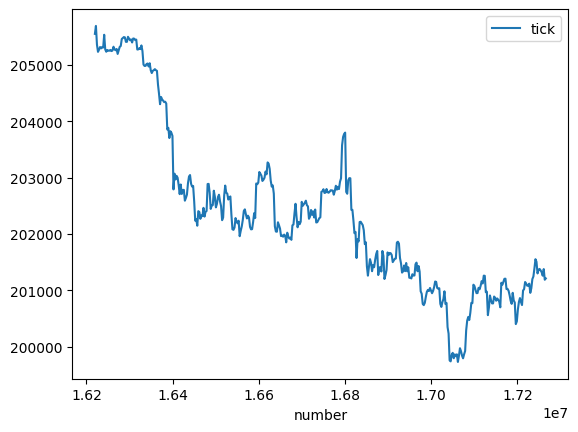

In [8]:
df.plot(x='number', y='tick')

In [9]:
# TODO: v (in token1 units) for each index in files array
# since compounding fees into principal each rebalance, only look at principal timeseries in units of token1
df['v'] = (df['values0'].astype('float')) * df['price'] + df['values1'].astype('float')

df['y'] = df['v'] / df['v'].iloc[0] - 1  # yield vs initial principal
df['i'] = df['v'] / (df['position_amount0'].astype('float').iloc[0] * df['price'] + df['position_amount1'].astype('float').iloc[0]) - 1  # yield vs initial passive hold

In [10]:
# accumulated fees and rate of return on them vs original principal value
df['f'] = (df['position_fees0_cumulative'].astype('float')) * df['price'] + df['position_fees1_cumulative'].astype('float')
df['r'] = df['f'] / df['v'].iloc[0]

In [11]:
df

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,...,position_amount0,position_amount1,position_fees0_cumulative,position_fees1_cumulative,price,v,y,i,f,r
0,16219693,1184180473737,1000096373981086032955,0,48211096091070,2302457180693885351454651093163492,205553,31203981017892687890,2181620581902003936411883992456929,1026699780925062056301321001565722942741084,...,1184294597923,1000000000000000000000,0,0,844547259,2.000193e+21,0.000000,-4.643245e-09,0.000000e+00,0.000000
1,16222093,1175860832468,1007172418046749714633,36870369,35121222243234717,2318747899162385489001287554456344,205694,17540821031132433136,2181985157052788187585985499073660,1027046583748145707407639599439896464086763,...,1184294597923,1000000000000000000000,0,0,856540493,2.014345e+21,0.007075,-2.553796e-05,0.000000e+00,0.000000
2,16224493,1195620849490,990526886870751338638,79507064,62541008198979213,2280425969616657314568929983238151,205361,30523448134936311091,2182406749771601875934982373447527,1027317711286579945199071017760952647928490,...,1184294597923,1000000000000000000000,0,0,828462373,1.981054e+21,-0.009569,-4.529701e-05,0.000000e+00,0.000000
3,16226893,1203225714564,984266362984504881565,110750550,85149890953964578,2266012770497242894086255374140612,205234,20905059435363221456,2182715686150892854181613442855243,1027541268492241619844457934521929909830784,...,1184294597923,1000000000000000000000,0,0,818023045,1.968533e+21,-0.015828,-1.257364e-04,0.000000e+00,0.000000
4,16229293,1200989209550,986275362611888780077,23041406,19906669647239693,2270435262486917424056195007509857,205273,22227312718227892744,2182943499819872818882169549269372,1027738088574684734465475778290005927962009,...,1203333135233,984354235432958918525,110750550,85149890953964578,821219170,1.972551e+21,-0.013820,-7.453382e-06,1.761004e+17,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,17256493,1483531666195,820791900865718094151,49305725,26475793703772034,1863578556449392031538434625661268,201323,27420357340978417904,2374915665675843076475381608708728,1143303341153993455122962271726629264301423,...,1480234759987,822620040623526736953,19637031525,11845236998428987242,553268878,1.641584e+21,-0.179287,-8.246295e-03,2.270980e+19,0.011354
433,17258893,1488138579228,818304518861634471574,14056381,6520485285497433,1857870207979672951132848076883101,201262,28684533318695592725,2375052732962575387887576720301920,1143366924034890098429964558540172533901472,...,1483580245964,820818778107487647719,19686337250,11871712792132759276,549884621,1.636609e+21,-0.181774,-8.851819e-03,2.269693e+19,0.011347
434,17261293,1479470248169,823099028576077162663,27350472,16283872429414352,1868755613785232690185652557661677,201379,20097267437575475732,2375182366967365283755698550567022,1143462129261915180149816108783753626834180,...,1483580245964,820818778107487647719,19686337250,11871712792132759276,556347131,1.646198e+21,-0.176980,-7.644226e-03,2.282415e+19,0.011411
435,17263693,1493455353249,815391314796296811690,56383853,28434060989323540,1851256099273191187753267917130117,201190,29915981331513473191,2375465478720511304356360392619927,1143580608785792754282024902648959495253213,...,1483580245964,820818778107487647719,19686337250,11871712792132759276,545976358,1.630783e+21,-0.184687,-9.604186e-03,2.261999e+19,0.011309


<Axes: xlabel='number'>

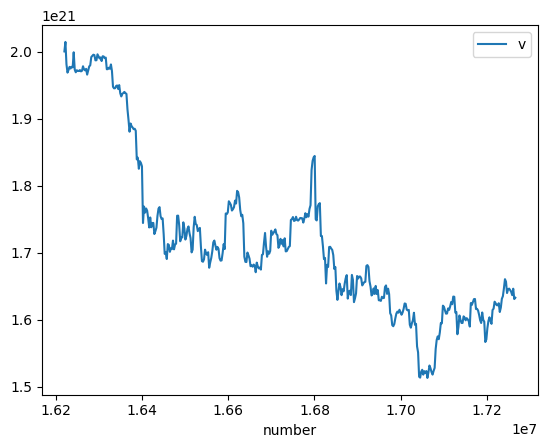

In [12]:
# value in units of token1 over time
df.plot(x='number', y='v')

<Axes: xlabel='number'>

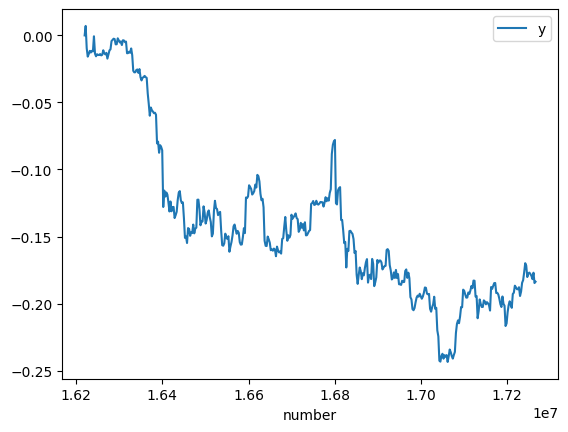

In [13]:
# yield in units of token1 over time relative to initial principal
df.plot(x='number', y='y')

<Axes: xlabel='number'>

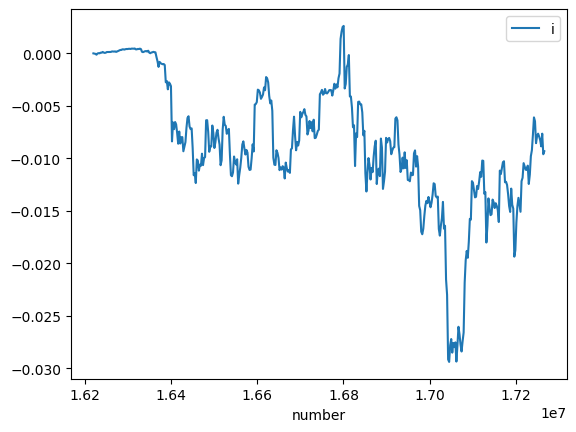

In [14]:
# yield in units of token1 over time relative to passive hold
df.plot(x='number', y='i')

<Axes: xlabel='number'>

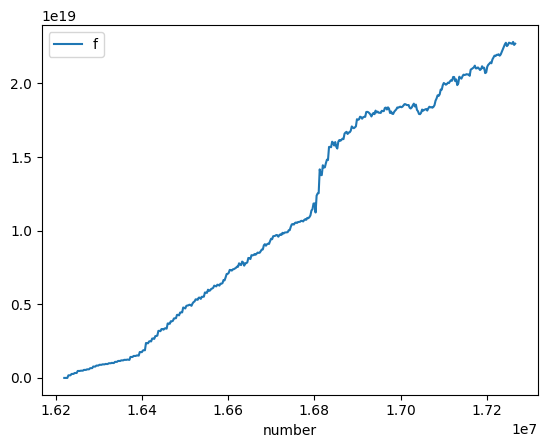

In [15]:
# accumulated fees in units of token1 over time
df.plot(x='number', y='f')

<Axes: xlabel='number'>

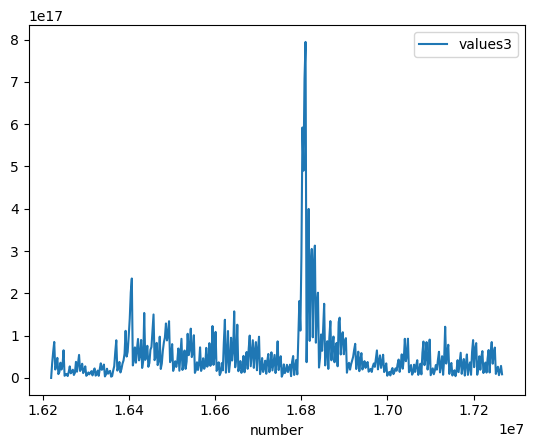

In [16]:
# fees in units of token1 over time
df.plot(x='number', y='values3')

<Axes: xlabel='number'>

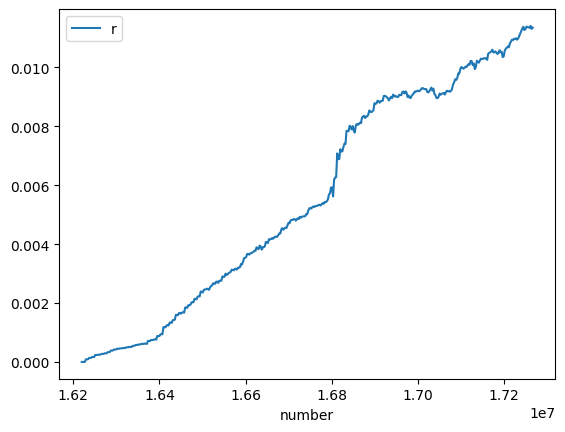

In [17]:
# fee return in units of token1 over time
df.plot(x='number', y='r')